In [2]:
import requests

SSBD_BASE_URL = "http://ssbd.qbic.riken.jp/image"

In [3]:
url = "%s/webclient" % SSBD_BASE_URL

if requests.session().get(url).status_code == 200:
    print("Successfully connected to OMERO")

print(url)

Successfully connected to OMERO
http://ssbd.qbic.riken.jp/image/webclient


In [4]:
from IPython.display import display, HTML

IMAGE_ID = 36874
TMP_URL = "{base}/webgateway/render_image/{image_id}/0/0/"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}

url = TMP_URL.format(**qs)
display(HTML("<img src='%s' />" % url))

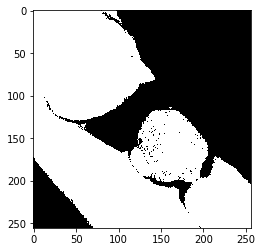

In [5]:
import cv2
import numpy as np
import urllib
from PIL import Image
import matplotlib.pyplot as plt

def url_to_image(url):
    resp = urllib.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

image = url_to_image(url)

thresh = 100
max_pixel = 255
ret, img_dst = cv2.threshold(image, thresh, max_pixel, cv2.THRESH_BINARY)
dst_list = np.asarray(img_dst)
plt.imshow(dst_list)
plt.show()